In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
df=pd.read_excel(r"C:\Users\abhis\OneDrive\Desktop\Online Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#get column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
#get datatypes
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
#changes datatype to datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
#splits datetime data into day,month,year

df['Day']=df['InvoiceDate'].dt.day
df['Month']=df['InvoiceDate'].dt.month
df['Year']=df['InvoiceDate'].dt.year
df['Hour']=df['InvoiceDate'].dt.hour
df['Minutes']=df['InvoiceDate'].dt.minute
df['Sec']=df['InvoiceDate'].dt.second

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Day', 'Month', 'Year', 'Hour',
       'Minutes', 'Sec'],
      dtype='object')

C:\Users\abhis\AppData\Local\Temp\ipykernel_2660\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

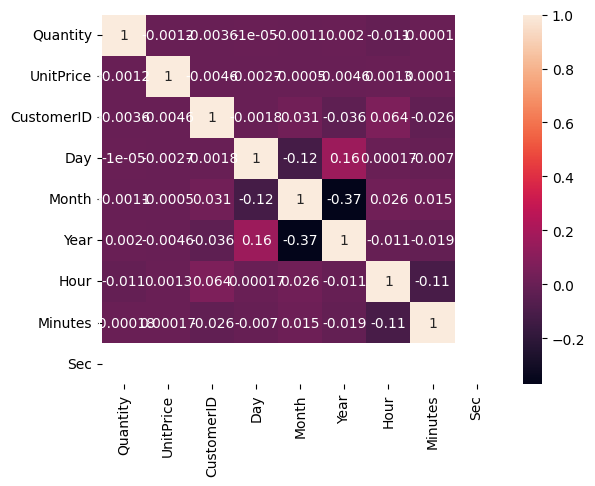

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Day                 0
Month               0
Year                0
Hour                0
Minutes             0
Sec                 0
dtype: int64

In [11]:
#fill na values of Customer id with previous values

df['CustomerID'].fillna(method ='pad', inplace=True)
df['CustomerID'].isna().sum()

0

<AxesSubplot: >

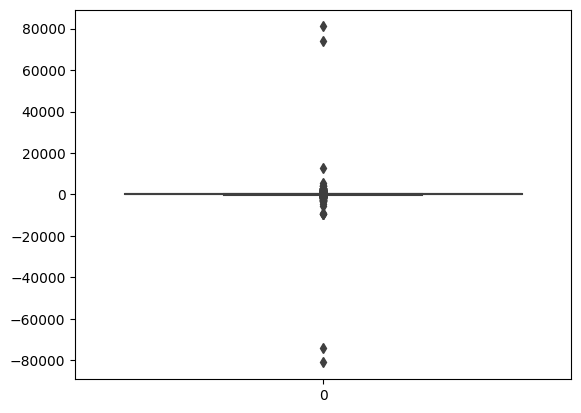

In [12]:
sns.boxplot(df['Quantity'])

In [13]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
print(IQR, lower, upper)

9.0 -12.5 23.5


In [14]:
outliers = np.where((df['Quantity'] < lower) | (df['Quantity'] > upper))
df['new_quantity']=df['Quantity'].drop(index=outliers[0])
df['new_quantity'].shape

(541909,)

<AxesSubplot: >

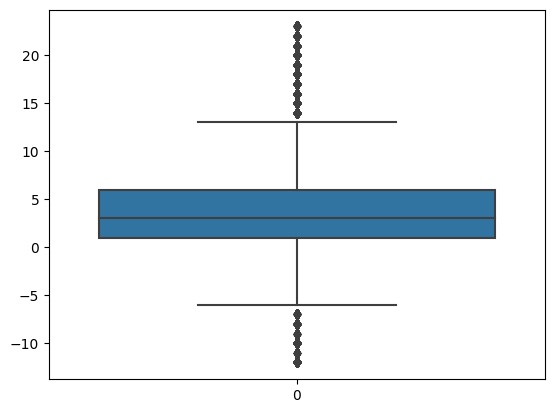

In [15]:
sns.boxplot(df['new_quantity'])

In [16]:
df['new_quantity'].fillna(df['new_quantity'].median(), inplace=True)
df['new_quantity'].isna().sum()

0

In [17]:
#separating dependent and independent variables

x=df[['CustomerID','Day','Month', 'Year','Hour','Minutes','Sec']]
y=df['new_quantity']

In [18]:
#training and testing split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=47)

In [21]:
#standardising the values of training data

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
#model training

model=Ridge()
model.fit(x_train,y_train)

Ridge()

In [23]:
#getting coefficients and intercept

print('coeficients=',model.coef_,'\nintercept=',model.intercept_)

coeficients= [-0.30087837 -0.00741053  0.04899709  0.18487963 -0.66018507 -0.00558367
  0.        ] 
intercept= 4.4035504132384125


In [24]:
#Prediction of test

y_pred=model.predict(x_test)
y_pred

array([5.00172244, 4.40824318, 4.07093618, ..., 3.67748355, 4.50315437,
       4.19401127])

In [25]:
#model Evaluation

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse,mae)

18.18902080642318 3.305800856546
